<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Exercise
(Fayyaz Minhas)

The objective of this exercise is to enable you to do regression with sklearn models. Please use the accompanying lecture slides for conceptural information.

## Ordinary Least Squares Regression (OLS)

Please try to understand the simple code for OLS given below and relate it to the concepts covere din the class.

This is a simple implementation of OLS as covered in the class. Please try to understand what individual lines in the code are doing.

Text(0.5, 1.0, 'Regression Scatter Plot')

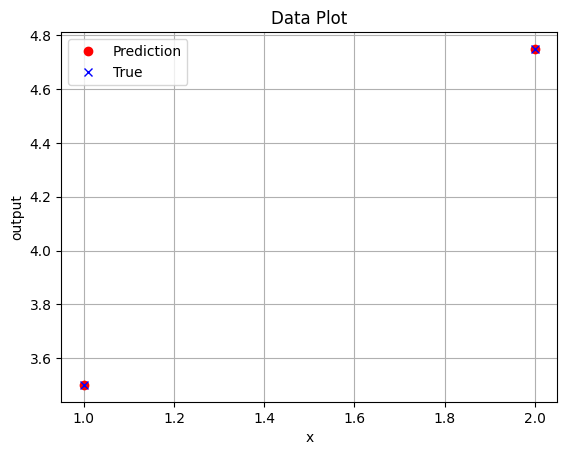

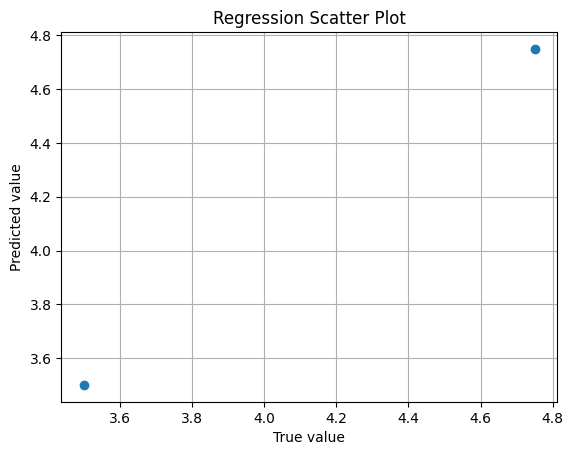

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X0 = np.array([[1],[2]])
y =np.array([3.5,4.75])
X = np.hstack((X0,np.ones((X0.shape[0],1)))) #append 1 to each example
w = np.linalg.pinv(X)@y
f = X@w
e = f-y
L = e@e
plt.figure();plt.plot(X0,f,'ro');plt.plot(X0,y,'bx');plt.grid();plt.xlabel('x');plt.ylabel('output');plt.legend(['Prediction','True']);plt.title('Data Plot')
plt.figure();plt.plot(y,f,'o');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')


Please answer the following questions:
0. Can you see a linear relationship between the input and output variables for the given data?
1. What is the pseudo inverse? What is the pseudo inverse of the given Matrix?
2. What does the model predict for an example with a feature value of 1.4?
3. How do the model's predictions change when you add another example (say, 1.6) with a feature value (say, 4.6)?

### OLS using sklearn

The code below uses sk-learn for OLS over the same data as above. Please try to understand the role of fit_intercept in the code below and answer the following questions:

1. Are your weights from sklearn OLS the same as you got above?
2. What is the role of fit_intercept?
3. Generate a prediction for a new example using the trained model.

Weights: [1.25 2.25]
Weights: [1.25]


Text(0.5, 1.0, 'Regression Scatter Plot')

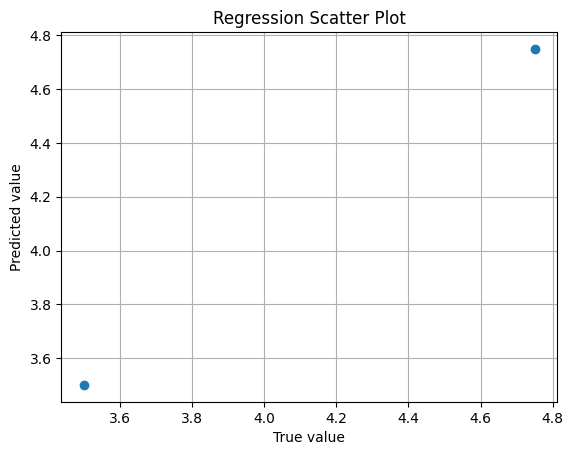

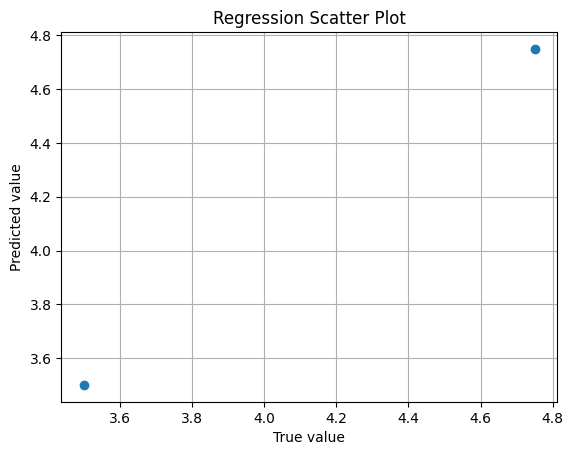

In [2]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept = False).fit(X, y)
f = regr.predict(X)
print('Weights:',regr.coef_)

plt.figure();plt.plot(y,f,'o');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')

# No need to append 1 to feature vector using below
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept = True).fit(X0, y)
f = regr.predict(X0)
print('Weights:',regr.coef_)
plt.figure();plt.plot(y,f,'o');plt.grid();plt.xlabel('True value');plt.ylabel('Predicted value');plt.title('Regression Scatter Plot')


## Ridge Regression

Ridge regression is OLS but with a regularizer. In the code below, we will be using both OLS and Ridge Regression for a simple task and try to understand the differences between the two. Here, we train both OLS and Ridge regression over a very small dataset but after adding noise to the example features to test the noise robustness of both models. Please go through the code and try to understand it.

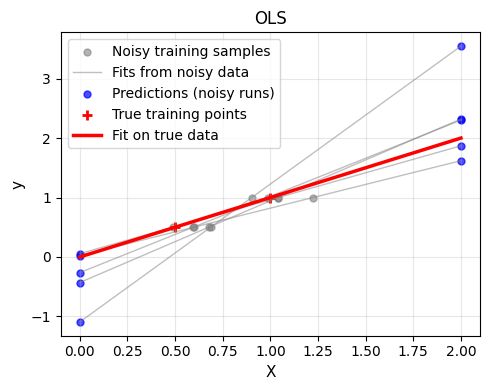

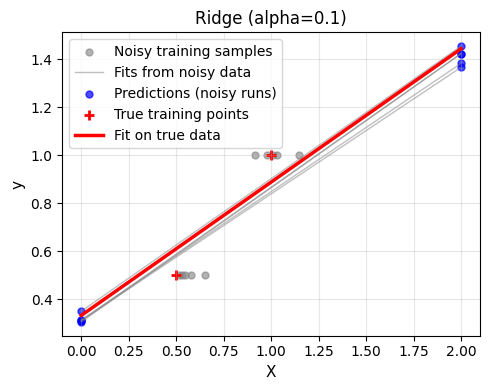

In [3]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------
# Data
# ---------------------------------------
X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test  = np.c_[0, 2].T

np.random.seed(0)

regressors = {
    "OLS": linear_model.LinearRegression(),
    "Ridge (alpha=0.1)": linear_model.Ridge(alpha=.1)
}

# ---------------------------------------
# Plotting
# ---------------------------------------
for name, regr in regressors.items():
    fig, ax = plt.subplots(figsize=(5, 4))

    # store handles so legend is clean
    noisy_data_handle = None
    noisy_line_handle = None
    test_pred_handle  = None

    # ----- noisy runs -----
    for i in range(5):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        regr.fit(this_X, y_train)

        # noisy training points
        h1 = ax.scatter(
            this_X, y_train,
            s=25,
            color="gray",
            alpha=0.6,
            label="Noisy training samples" if i == 0 else None
        )
        if noisy_data_handle is None:
            noisy_data_handle = h1

        # noisy fitted line
        preds = regr.predict(X_test)
        h2 = ax.plot(
            X_test,
            preds,
            color="gray",
            alpha=0.5,
            linewidth=1,
            label="Fits from noisy data" if i == 0 else None
        )[0]
        if noisy_line_handle is None:
            noisy_line_handle = h2

        # predicted test points
        h3 = ax.scatter(
            X_test,
            preds,
            s=25,
            color="blue",
            alpha=0.7,
            label="Predictions (noisy runs)" if i == 0 else None
        )
        if test_pred_handle is None:
            test_pred_handle = h3

    # ----- clean fit -----
    regr.fit(X_train, y_train)

    clean_points = ax.scatter(
        X_train,
        y_train,
        s=60,
        color="red",
        marker="+",
        linewidth=2,
        label="True training points"
    )

    clean_line = ax.plot(
        X_test,
        regr.predict(X_test),
        color="red",
        linewidth=2.5,
        label="Fit on true data"
    )[0]

    # ----- formatting -----
    ax.set_title(name, fontsize=12)
    ax.set_xlabel("X", fontsize=11)
    ax.set_ylabel("y", fontsize=11)

    ax.grid(True, alpha=0.3)
    ax.legend(frameon=True)

    fig.tight_layout()

plt.show()


We do multiple runs in training the two methods with different noise added to the training examples and then plot the results for a simple test data. Answer the following questions:
1. Do you see that each time the OLS is trained, it fits the training examples perfectly?
2. Do you see that each time the OLS is trained with added noise, it fits a very different line as it fits the training examples perfectly? You can view the weight vectors of the fitted model after each training to understand this better as well.
3. Do you see that the line you get when OLS is trained without added noise is significantly different from the lines you get with added noise?
4. Do you see that each time the Ridge regression model is trained, it DOES NOT fit the training examples perfectly? You can view the weight vectors of the fitted model to understand this better as well.
5. Do you see that each time the ridge regression is trained with added noise, it fits a somewhat similar line?
6. Do you see that the line you get when ridge regression is trained without added noise is closer to the lines you get with added noise in comparison to the OLS model?
7. Which model is more impacted by added noise?
8. Try to understand the impact of regularization by changing the alpha hyper-parameter of the ridge regression model.

# Practical Exercise

So far we have explored regression on tiny toy examples to understand how different models behave. The next step is to see what regression looks like in a realistic setting where we have many features, noisy measurements, and limited data. In practice, regression is rarely about drawing a line through two points. It is about learning a mapping from a vector of measured variables to a continuous outcome, while making sure that what we learn generalises to new data.

In this section we use a real dataset from scikit-learn and compare several common regression models: ordinary least squares, ridge regression, and support vector regression. The goal is not just to fit the training data but to evaluate how well each model predicts unseen samples. To do this properly we separate the data into three parts: a training set used to fit the model, a validation set used to assess choices and tune parameters, and a held-out test set used only at the end to estimate real-world performance.

We will evaluate models using several complementary metrics. Mean squared error and mean absolute error quantify prediction accuracy. The coefficient of determination R² measures how much variance in the outcome is explained by the model. Pearson correlation captures linear agreement between predicted and true values, while Spearman correlation measures whether the ranking of predictions is correct even if the scale is imperfect. Looking at multiple metrics gives a more complete picture of model behaviour.

We will also use cross-validation on the training and validation data. Cross-validation repeatedly splits the data into folds, trains on some folds, and evaluates on the remaining ones. This provides a more stable estimate of performance and helps us understand how sensitive a model is to the particular samples it sees.

The aim of this exercise is to show what practical regression evaluation looks like in applied machine learning: careful data splitting, consistent metrics, and comparison across models. This is the workflow you should follow whenever you build a regression model on real data.

Can you find which model works best? Can you calculate some performance metrics (https://scikit-learn.org/stable/modules/model_evaluation.html) for the test set? (see class notes for more details).

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# -----------------------------
# Correlation helpers (Pearson + Spearman)
# -----------------------------
def pearson_r(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    y_true = y_true - y_true.mean()
    y_pred = y_pred - y_pred.mean()
    denom = np.linalg.norm(y_true) * np.linalg.norm(y_pred)
    if denom == 0:
        return np.nan
    return float(np.dot(y_true, y_pred) / denom)

def _rankdata_average_ties(x):
    """
    Simple rankdata with average ranks for ties (1..n), no SciPy needed.
    """
    x = np.asarray(x)
    order = np.argsort(x, kind="mergesort")
    ranks = np.empty(len(x), dtype=float)
    ranks[order] = np.arange(1, len(x) + 1, dtype=float)

    # handle ties by averaging ranks within tied groups
    x_sorted = x[order]
    i = 0
    while i < len(x_sorted):
        j = i
        while j + 1 < len(x_sorted) and x_sorted[j + 1] == x_sorted[i]:
            j += 1
        if j > i:
            avg = (i + 1 + j + 1) / 2.0
            ranks[order[i:j+1]] = avg
        i = j + 1
    return ranks

def spearman_rho(y_true, y_pred):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    ry = _rankdata_average_ties(y_true)
    rp = _rankdata_average_ties(y_pred)
    return pearson_r(ry, rp)

# scorers for cross_validate (note: sklearn expects higher-is-better, so negate losses)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer  = make_scorer(r2_score)
pearson_scorer  = make_scorer(pearson_r)
spearman_scorer = make_scorer(spearman_rho)

# -----------------------------
# Load a real sklearn dataset
# -----------------------------
X, y = load_diabetes(return_X_y=True)

# Train / Validation / Test split: 60 / 20 / 20
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_val,  y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)  # 0.25 of 0.8 = 0.2

# -----------------------------
# Models
# -----------------------------
models = {
    "OLS": LinearRegression(),
    "Ridge(alpha=1.0)": Ridge(alpha=1.0, random_state=0),
    "SVR(linear, C=1.0)": make_pipeline(StandardScaler(), SVR(kernel="linear", C=1.0)),
    "SVR(RBF, C=10.0, eps=0.1)": make_pipeline(StandardScaler(), SVR(kernel="rbf", C=10.0, epsilon=0.1, gamma="scale")),
}

# -----------------------------
# Evaluation on Train / Val / Test
# -----------------------------
def evaluate_split(model, Xs, ys):
    preds = model.predict(Xs)
    return {
        "MSE": mean_squared_error(ys, preds),
        "MAE": mean_absolute_error(ys, preds),
        "R2":  r2_score(ys, preds),
        "Pearson r": pearson_r(ys, preds),
        "Spearman ρ": spearman_rho(ys, preds),
    }

rows = []
for name, model in models.items():
    model.fit(X_train, y_train)
    train_metrics = evaluate_split(model, X_train, y_train)
    val_metrics   = evaluate_split(model, X_val, y_val)
    test_metrics  = evaluate_split(model, X_test, y_test)

    rows.append({
        "Model": name,
        "Split": "Train",
        **train_metrics
    })
    rows.append({
        "Model": name,
        "Split": "Validation",
        **val_metrics
    })
    rows.append({
        "Model": name,
        "Split": "Test",
        **test_metrics
    })

df_splits = pd.DataFrame(rows)

# nicer formatting
def fmt(x):
    if isinstance(x, (float, np.floating)):
        return f"{x:.4f}"
    return x

print("\n=== Train / Validation / Test metrics ===")
print(df_splits.assign(**{c: df_splits[c].map(fmt) for c in df_splits.columns if c not in ["Model", "Split"]})
      .to_string(index=False))

# -----------------------------
# Cross-validation on Train+Validation (i.e., development set)
# -----------------------------
X_dev = np.vstack([X_train, X_val])
y_dev = np.concatenate([y_train, y_val])

cv = KFold(n_splits=5, shuffle=True, random_state=0)

scoring = {
    "mse": mse_scorer,
    "mae": mae_scorer,
    "r2": r2_scorer,
    "pearson": pearson_scorer,
    "spearman": spearman_scorer,
}

cv_rows = []
for name, model in models.items():
    cv_res = cross_validate(model, X_dev, y_dev, cv=cv, scoring=scoring, n_jobs=None)

    # negate losses back to positive
    mse_vals = -cv_res["test_mse"]
    mae_vals = -cv_res["test_mae"]

    cv_rows.append({
        "Model": name,
        "CV MSE (mean±sd)": f"{mse_vals.mean():.4f} ± {mse_vals.std(ddof=1):.4f}",
        "CV MAE (mean±sd)": f"{mae_vals.mean():.4f} ± {mae_vals.std(ddof=1):.4f}",
        "CV R2 (mean±sd)":  f"{cv_res['test_r2'].mean():.4f} ± {cv_res['test_r2'].std(ddof=1):.4f}",
        "CV Pearson r (mean±sd)":  f"{cv_res['test_pearson'].mean():.4f} ± {cv_res['test_pearson'].std(ddof=1):.4f}",
        "CV Spearman ρ (mean±sd)": f"{cv_res['test_spearman'].mean():.4f} ± {cv_res['test_spearman'].std(ddof=1):.4f}",
    })

df_cv = pd.DataFrame(cv_rows)

print("\n=== 5-fold CV on Train+Validation (development set) ===")
print(df_cv.to_string(index=False))



=== Train / Validation / Test metrics ===
                    Model      Split       MSE     MAE     R2 Pearson r Spearman ρ
                      OLS      Train 2703.4403 41.8621 0.5575    0.7467     0.7170
                      OLS Validation 3032.5109 45.2927 0.4974    0.7065     0.6988
                      OLS       Test 3383.6745 45.9212 0.3401    0.5951     0.5977
         Ridge(alpha=1.0)      Train 3405.0030 49.4630 0.4427    0.7157     0.6896
         Ridge(alpha=1.0) Validation 3659.7257 50.8111 0.3934    0.6689     0.6737
         Ridge(alpha=1.0)       Test 3420.7212 46.8247 0.3329    0.6102     0.6160
       SVR(linear, C=1.0)      Train 2760.3935 41.9465 0.5482    0.7424     0.7114
       SVR(linear, C=1.0) Validation 3123.6209 46.0286 0.4823    0.6948     0.6883
       SVR(linear, C=1.0)       Test 3384.3227 45.7130 0.3400    0.5869     0.5942
SVR(RBF, C=10.0, eps=0.1)      Train 2531.9845 40.2318 0.5856    0.7853     0.7615
SVR(RBF, C=10.0, eps=0.1) Validation 3370.13

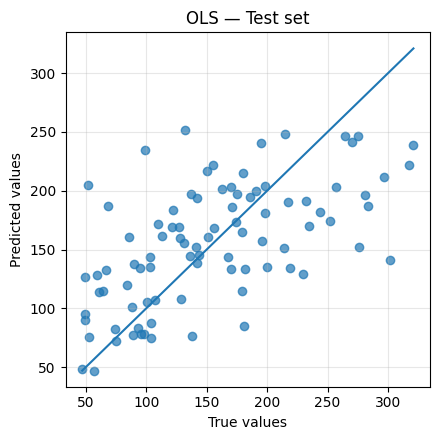

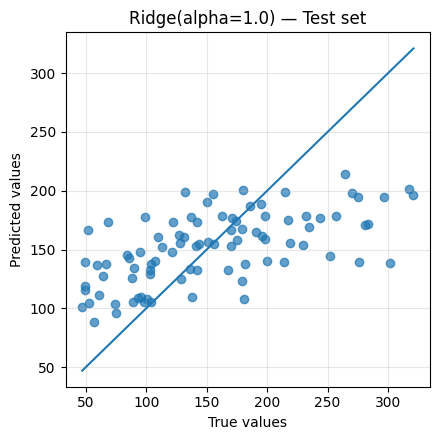

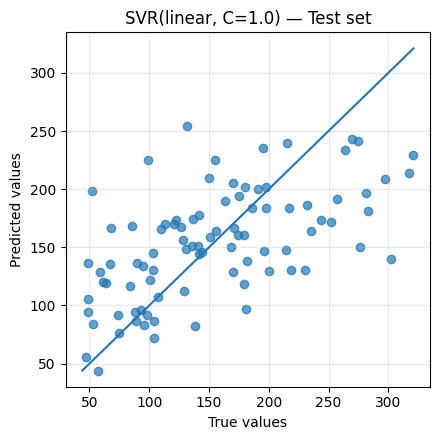

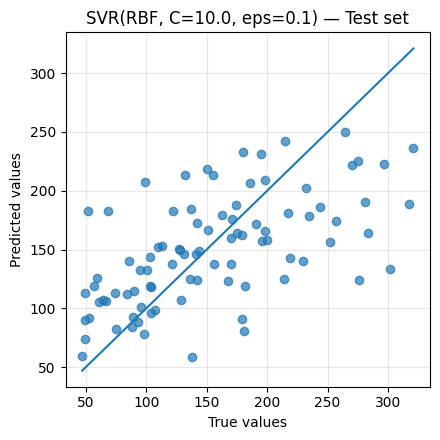

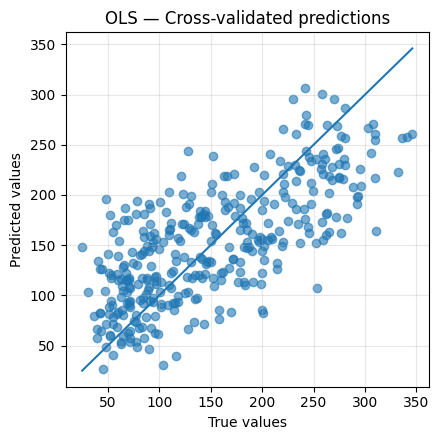

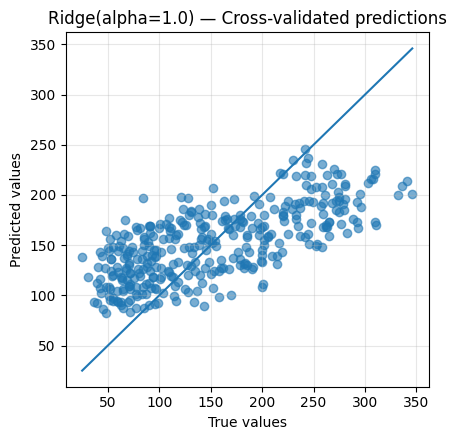

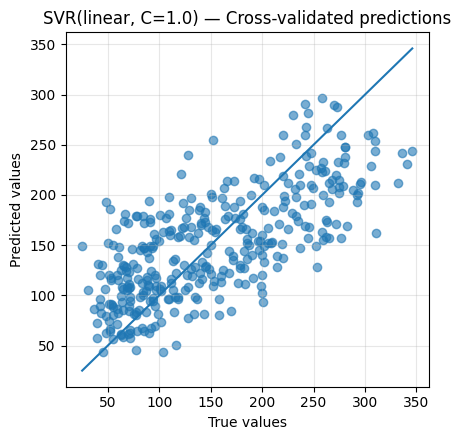

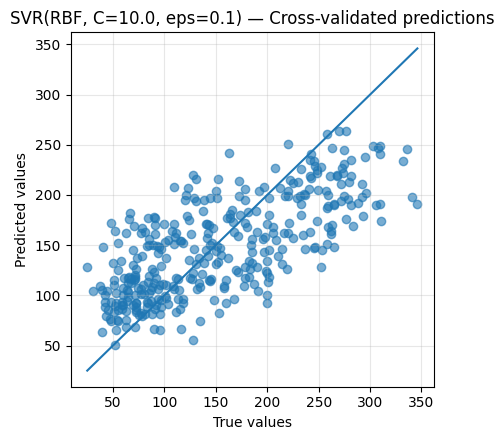

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict
from sklearn.base import clone

# -------------------------------------------------
# TRUE vs PREDICTED PLOTS (TEST SET)
# -------------------------------------------------
for name, model in models.items():
    m = clone(model)
    m.fit(X_train, y_train)
    preds = m.predict(X_test)

    fig, ax = plt.subplots(figsize=(4.5,4.5))

    ax.scatter(y_test, preds, alpha=0.7)

    # identity line
    lo = min(y_test.min(), preds.min())
    hi = max(y_test.max(), preds.max())
    ax.plot([lo, hi], [lo, hi])

    ax.set_xlabel("True values")
    ax.set_ylabel("Predicted values")
    ax.set_title(f"{name} — Test set")
    ax.grid(True, alpha=0.3)

    plt.tight_layout()

plt.show()


# -------------------------------------------------
# TRUE vs PREDICTED FROM CROSS-VALIDATION
# (uses development set = train + validation)
# -------------------------------------------------
X_dev = np.vstack([X_train, X_val])
y_dev = np.concatenate([y_train, y_val])

for name, model in models.items():
    preds_cv = cross_val_predict(model, X_dev, y_dev, cv=5)

    fig, ax = plt.subplots(figsize=(4.5,4.5))

    ax.scatter(y_dev, preds_cv, alpha=0.6)

    lo = min(y_dev.min(), preds_cv.min())
    hi = max(y_dev.max(), preds_cv.max())
    ax.plot([lo, hi], [lo, hi])

    ax.set_xlabel("True values")
    ax.set_ylabel("Predicted values")
    ax.set_title(f"{name} — Cross-validated predictions")
    ax.grid(True, alpha=0.3)

    plt.tight_layout()

plt.show()


## A deeper look into regression

Please see our more detailed tutorial on the subject here:

https://github.com/foxtrotmike/CS909/blob/master/regression_residuals.ipynb



